<a href="https://colab.research.google.com/github/SantoshMahara/Stock_Price_Predicton_TATASteel/blob/main/TATA_STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

# giving the start and end dates
startDate = '2010-03-01'
endDate = '2024-01-01'

# setting the ticker value
ticker = "TCS"#"TATACHEM","TATACOMM","NELCOL","RALLIS","TCS"

# downloading the data of the ticker value between
# the start and end dates
resultData = yf.download(ticker, startDate, endDate)

# Setting date as index
resultData["Date"] = resultData.index

# Giving column names
#resultData = resultData[["TATACHEM","TATACOMM","NELCOL","RALLIS","TCS'",'TATASTEEL','TATAPOWER','VOLTAS','TRENT','TITAN']]
resultData = resultData[["Date", "Open", "High","Low", "Close", "Adj Close", "Volume"]]

# Resetting the index values
resultData.reset_index(drop=True, inplace=True)

#import data in csv file
df = pd.DataFrame(resultData)

# Save the dataframe to a CSV file
df.to_csv('Tata.csv', index=False)

# getting the first 5 rows of the data
print(df.head())

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close    Volume
0 2013-11-01  35.000000  37.000000  32.099998  36.200001  33.839130  14667600
1 2013-11-04  36.799999  36.799999  34.689999  35.349998  33.044563   1586600
2 2013-11-05  35.110001  35.500000  34.820000  35.349998  33.044563    337700
3 2013-11-06  35.610001  36.490002  35.610001  35.900002  33.558697    549600
4 2013-11-07  36.799999  36.799999  34.119999  35.310001  33.007175    883700


2. **Analyze** **data**

In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df=pd.read_csv('/content/sample_data/TATASTEEL.NS.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-10,59.260220,60.641685,58.774323,60.379684,42.090149,58460615.0
1,05-01-10,60.836998,62.385197,60.836998,61.842136,43.109604,81889733.0
2,06-01-10,62.880619,62.880619,60.689323,61.170456,42.641384,77150753.0
3,07-01-10,61.441986,62.194649,60.984673,61.908825,43.156097,80144960.0
4,08-01-10,62.023155,63.023529,61.060890,61.780209,43.066437,86063510.0
...,...,...,...,...,...,...,...
3474,18-01-24,131.649994,132.250000,128.199997,131.000000,131.000000,45273496.0
3475,19-01-24,132.600006,134.699997,131.600006,134.250000,134.250000,32653013.0
3476,22-01-24,134.250000,134.250000,134.250000,134.250000,134.250000,0.0
3477,23-01-24,134.800003,135.199997,129.300003,130.100006,130.100006,35373970.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3479 non-null   object 
 1   Open       3472 non-null   float64
 2   High       3472 non-null   float64
 3   Low        3472 non-null   float64
 4   Close      3472 non-null   float64
 5   Adj Close  3472 non-null   float64
 6   Volume     3472 non-null   float64
dtypes: float64(6), object(1)
memory usage: 190.4+ KB


In [ ]:
df['Date']= pd.to_datetime(df['Date']).dt.date
df['Date']= pd.to_datetime(df['Date'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3479 non-null   datetime64[ns]
 1   Open       3472 non-null   float64       
 2   High       3472 non-null   float64       
 3   Low        3472 non-null   float64       
 4   Close      3472 non-null   float64       
 5   Adj Close  3472 non-null   float64       
 6   Volume     3472 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 190.4 KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-01,59.260220,60.641685,58.774323,60.379684,42.090149,58460615.0
1,2010-05-01,60.836998,62.385197,60.836998,61.842136,43.109604,81889733.0
2,2010-06-01,62.880619,62.880619,60.689323,61.170456,42.641384,77150753.0
3,2010-07-01,61.441986,62.194649,60.984673,61.908825,43.156097,80144960.0
4,2010-08-01,62.023155,63.023529,61.060890,61.780209,43.066437,86063510.0
...,...,...,...,...,...,...,...
3474,2024-01-18,131.649994,132.250000,128.199997,131.000000,131.000000,45273496.0
3475,2024-01-19,132.600006,134.699997,131.600006,134.250000,134.250000,32653013.0
3476,2024-01-22,134.250000,134.250000,134.250000,134.250000,134.250000,0.0
3477,2024-01-23,134.800003,135.199997,129.300003,130.100006,130.100006,35373970.0


In [ ]:
new_df = df.replace(0, np.nan)
new_df = new_df.dropna(how='all', axis=0)
new_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-01,59.260220,60.641685,58.774323,60.379684,42.090149,58460615.0
1,2010-05-01,60.836998,62.385197,60.836998,61.842136,43.109604,81889733.0
2,2010-06-01,62.880619,62.880619,60.689323,61.170456,42.641384,77150753.0
3,2010-07-01,61.441986,62.194649,60.984673,61.908825,43.156097,80144960.0
4,2010-08-01,62.023155,63.023529,61.060890,61.780209,43.066437,86063510.0
...,...,...,...,...,...,...,...
3474,2024-01-18,131.649994,132.250000,128.199997,131.000000,131.000000,45273496.0
3475,2024-01-19,132.600006,134.699997,131.600006,134.250000,134.250000,32653013.0
3476,2024-01-22,134.250000,134.250000,134.250000,134.250000,134.250000,NaN
3477,2024-01-23,134.800003,135.199997,129.300003,130.100006,130.100006,35373970.0


In [ ]:
new_df = df[df.loc[:]!=0].dropna()

In [ ]:
new_df.isna().sum()
# new_df.duplicated().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df1=new_df
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-01,59.260220,60.641685,58.774323,60.379684,42.090149,58460615.0
1,2010-05-01,60.836998,62.385197,60.836998,61.842136,43.109604,81889733.0
2,2010-06-01,62.880619,62.880619,60.689323,61.170456,42.641384,77150753.0
3,2010-07-01,61.441986,62.194649,60.984673,61.908825,43.156097,80144960.0
4,2010-08-01,62.023155,63.023529,61.060890,61.780209,43.066437,86063510.0
...,...,...,...,...,...,...,...
3473,2024-01-17,135.449997,135.750000,131.399994,131.649994,131.649994,58982971.0
3474,2024-01-18,131.649994,132.250000,128.199997,131.000000,131.000000,45273496.0
3475,2024-01-19,132.600006,134.699997,131.600006,134.250000,134.250000,32653013.0
3477,2024-01-23,134.800003,135.199997,129.300003,130.100006,130.100006,35373970.0


In [ ]:
new_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3.468000e+03
mean,58.780933,59.597892,57.867151,58.695376,50.340472,7.716744e+07
std,31.674583,32.011723,31.237342,31.603504,32.312899,5.923548e+07
min,18.816547,19.626373,18.606947,18.888002,14.492750,4.138710e+06
25%,37.012862,37.531868,36.364765,36.942362,28.798629,4.125603e+07
50%,47.668417,48.407011,46.928995,47.630680,38.417423,5.976264e+07
75%,64.619362,65.549959,63.840016,64.625317,54.782705,9.149601e+07
max,151.940002,153.449997,149.175003,151.940002,139.850006,6.428460e+08


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3468 non-null   datetime64[ns]
 1   Open       3468 non-null   float64       
 2   High       3468 non-null   float64       
 3   Low        3468 non-null   float64       
 4   Close      3468 non-null   float64       
 5   Adj Close  3468 non-null   float64       
 6   Volume     3468 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 216.8 KB


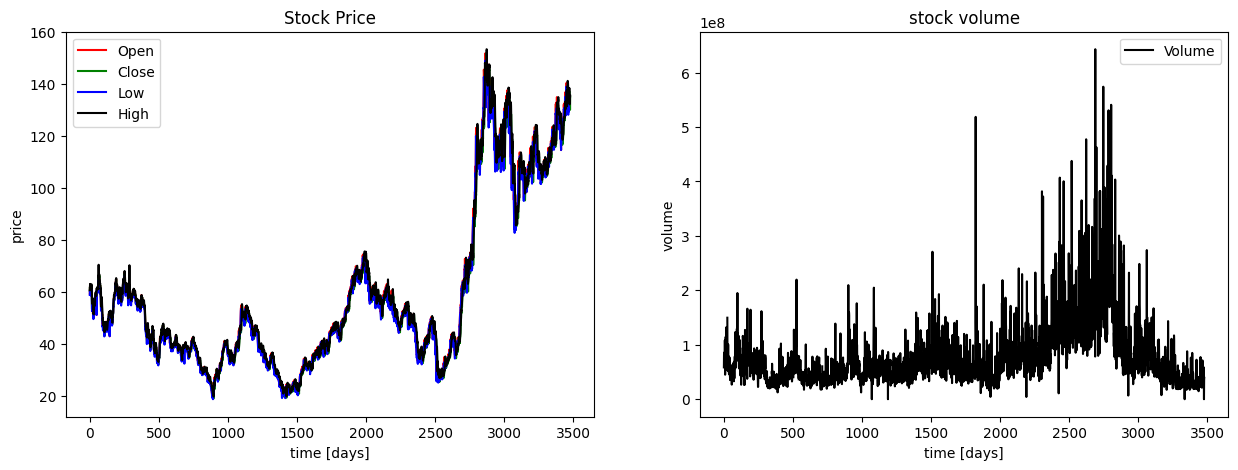

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df1['Open'].values, color='red', label='Open')
plt.plot(df['Close'].values, color='green', label='Close')
plt.plot(df1['Low'].values, color='blue', label='Low')
plt.plot(df['High'].values, color='black', label='High')
plt.title('Stock Price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df['Volume'].values, color='black', label='Volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');


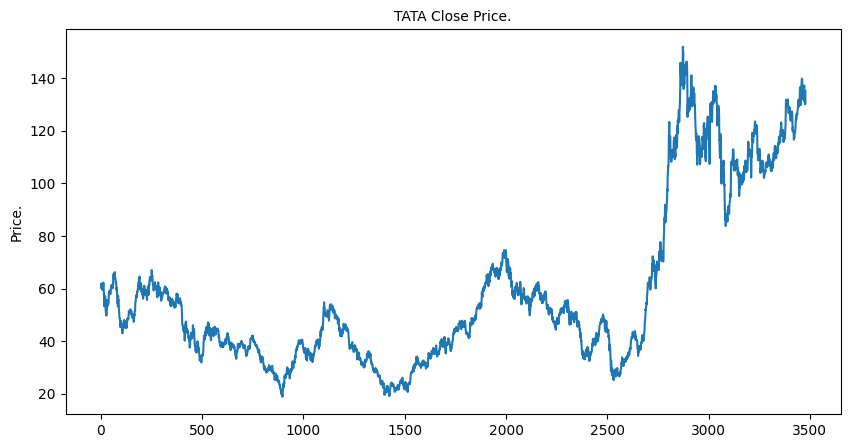

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df1['Close'])
plt.title('TATA Close Price.', fontsize=10)
plt.ylabel('Price.')
plt.show()

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

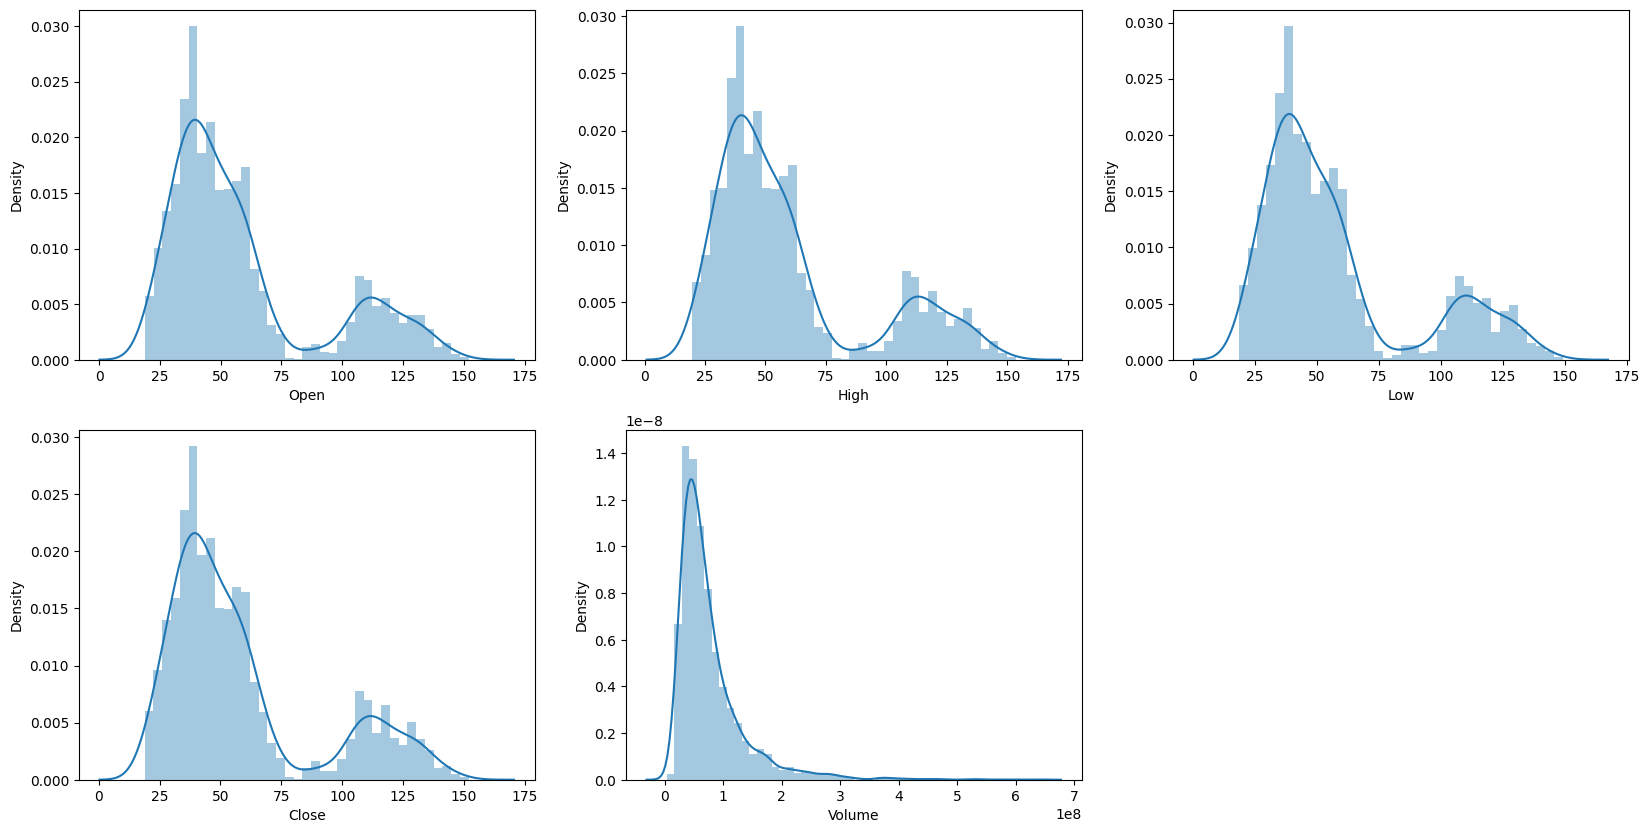

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df1[col])
plt.show()

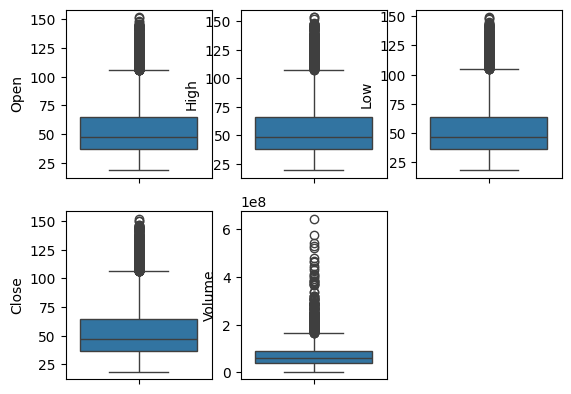

In [ ]:
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df1[col])
plt.show()

**Feature Engineering**

In [ ]:
df1['Year'] = df1['Date'].dt.strftime('%Y').astype(np.int64)
df1['Month'] = df1['Date'].dt.strftime('%m').astype(np.int64)
df1['Day'] = df1['Date'].dt.strftime('%d').astype(np.int64)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3478
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3468 non-null   datetime64[ns]
 1   Open       3468 non-null   float64       
 2   High       3468 non-null   float64       
 3   Low        3468 non-null   float64       
 4   Close      3468 non-null   float64       
 5   Adj Close  3468 non-null   float64       
 6   Volume     3468 non-null   float64       
 7   Year       3468 non-null   int64         
 8   Month      3468 non-null   int64         
 9   Day        3468 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 298.0 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [ ]:
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,is_quarter_end
3473,2024-01-17,135.449997,135.750000,131.399994,131.649994,131.649994,58982971.0,2024,1,17,0
3474,2024-01-18,131.649994,132.250000,128.199997,131.000000,131.000000,45273496.0,2024,1,18,0
3475,2024-01-19,132.600006,134.699997,131.600006,134.250000,134.250000,32653013.0,2024,1,19,0
3477,2024-01-23,134.800003,135.199997,129.300003,130.100006,130.100006,35373970.0,2024,1,23,0
3478,2024-01-24,130.199997,135.550003,130.100006,135.149994,135.149994,39340119.0,2024,1,24,0


In [ ]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2010-04-01,59.260220,60.641685,58.774323,60.379684,42.090149,58460615.0,2010,04,01
1,2010-05-01,60.836998,62.385197,60.836998,61.842136,43.109604,81889733.0,2010,05,01
2,2010-06-01,62.880619,62.880619,60.689323,61.170456,42.641384,77150753.0,2010,06,01
3,2010-07-01,61.441986,62.194649,60.984673,61.908825,43.156097,80144960.0,2010,07,01
4,2010-08-01,62.023155,63.023529,61.060890,61.780209,43.066437,86063510.0,2010,08,01


In [ ]:
df1['is_quarter_end'] =np.where(df1['Month']%3==0,1,0)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,is_quarter_end
0,2010-04-01,59.260220,60.641685,58.774323,60.379684,42.090149,58460615.0,2010,4,1,0
1,2010-05-01,60.836998,62.385197,60.836998,61.842136,43.109604,81889733.0,2010,5,1,0
2,2010-06-01,62.880619,62.880619,60.689323,61.170456,42.641384,77150753.0,2010,6,1,1
3,2010-07-01,61.441986,62.194649,60.984673,61.908825,43.156097,80144960.0,2010,7,1,0
4,2010-08-01,62.023155,63.023529,61.060890,61.780209,43.066437,86063510.0,2010,8,1,0


In [63]:
# result = []
# for value in df1['Month']:
#   if df1['Month']%3==0:
#       result.append("1")
#   else:
#       result.append("0")

# df1['is_quarter_end'] = result
# print(df1)
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,is_quarter_end
count,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3.468000e+03,3468.000000,3468.000000,3468.000000,3468.000000
mean,58.780933,59.597892,57.867151,58.695376,50.340472,7.716744e+07,2016.536621,6.539504,15.694348,0.338235
std,31.674583,32.011723,31.237342,31.603504,32.312899,5.923548e+07,4.059137,3.438847,8.838127,0.473177
min,18.816547,19.626373,18.606947,18.888002,14.492750,4.138710e+06,2010.000000,1.000000,1.000000,0.000000
25%,37.012862,37.531868,36.364765,36.942362,28.798629,4.125603e+07,2013.000000,4.000000,8.000000,0.000000
50%,47.668417,48.407011,46.928995,47.630680,38.417423,5.976264e+07,2017.000000,7.000000,16.000000,0.000000
75%,64.619362,65.549959,63.840016,64.625317,54.782705,9.149601e+07,2020.000000,10.000000,23.000000,1.000000
max,151.940002,153.449997,149.175003,151.940002,139.850006,6.428460e+08,2024.000000,12.000000,31.000000,1.000000


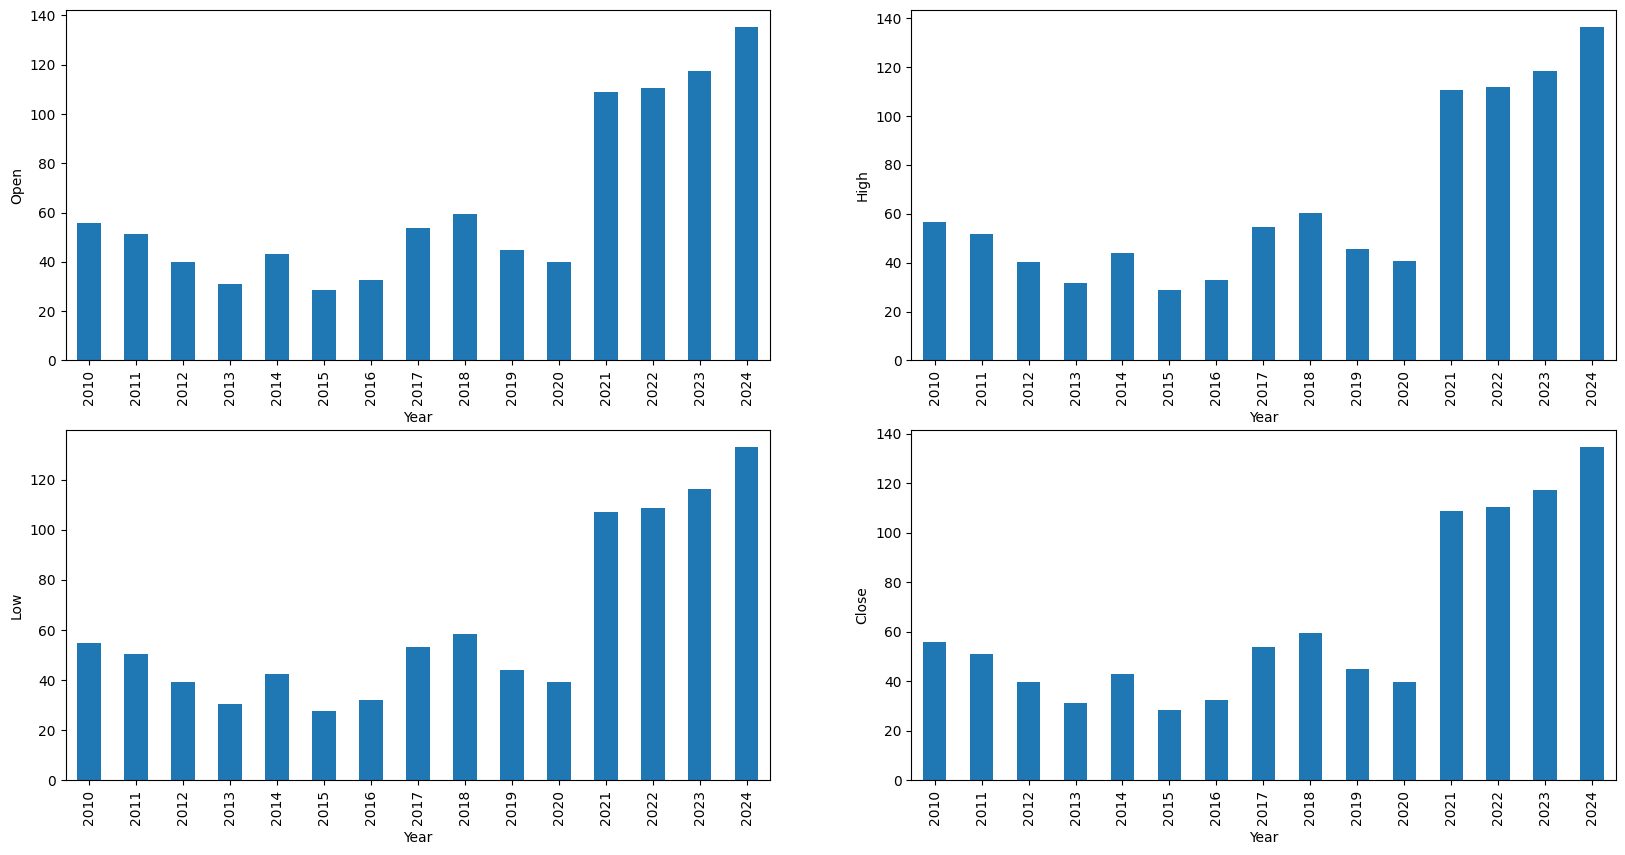

In [ ]:
data_grouped = df1.groupby('Year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
  plt.xlabel('Year')
  plt.ylabel(col)

plt.show()

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3478
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3468 non-null   datetime64[ns]
 1   Open            3468 non-null   float64       
 2   High            3468 non-null   float64       
 3   Low             3468 non-null   float64       
 4   Close           3468 non-null   float64       
 5   Adj Close       3468 non-null   float64       
 6   Volume          3468 non-null   float64       
 7   Year            3468 non-null   int64         
 8   Month           3468 non-null   int64         
 9   Day             3468 non-null   int64         
 10  is_quarter_end  3468 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 325.1 KB


In [64]:
df1.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
is_quarter_end,,,,,,,,,
0,58.592083,59.424108,57.675018,58.523662,50.149566,7.834796e+07,2016.533333,6.046623,15.705011
1,59.150423,59.937903,58.243064,59.031337,50.713983,7.485772e+07,2016.543052,7.503836,15.673487


In [67]:
df1['open-close']  = df1['Open'] - df1['Close']
df1['low-high']  = df1['Low'] - df1['High']
df1['target'] = np.where(df1['Close'].shift(-1) > df1['Close'], 1, 0)
df1

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,is_quarter_end,open-close,low-high,target
0,2010-04-01,59.260220,60.641685,58.774323,60.379684,42.090149,58460615.0,2010,4,1,0,-1.119464,-1.867362,1
1,2010-05-01,60.836998,62.385197,60.836998,61.842136,43.109604,81889733.0,2010,5,1,0,-1.005138,-1.548199,0
2,2010-06-01,62.880619,62.880619,60.689323,61.170456,42.641384,77150753.0,2010,6,1,1,1.710163,-2.191296,1
3,2010-07-01,61.441986,62.194649,60.984673,61.908825,43.156097,80144960.0,2010,7,1,0,-0.466839,-1.209976,0
4,2010-08-01,62.023155,63.023529,61.060890,61.780209,43.066437,86063510.0,2010,8,1,0,0.242946,-1.962639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,2024-01-17,135.449997,135.750000,131.399994,131.649994,131.649994,58982971.0,2024,1,17,0,3.800003,-4.350006,0
3474,2024-01-18,131.649994,132.250000,128.199997,131.000000,131.000000,45273496.0,2024,1,18,0,0.649994,-4.050003,1
3475,2024-01-19,132.600006,134.699997,131.600006,134.250000,134.250000,32653013.0,2024,1,19,0,-1.649994,-3.099991,0
3477,2024-01-23,134.800003,135.199997,129.300003,130.100006,130.100006,35373970.0,2024,1,23,0,4.699997,-5.899994,1


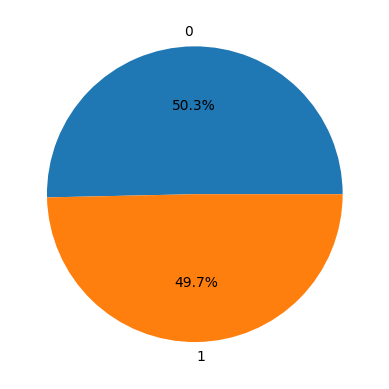

In [66]:
plt.pie(df1['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

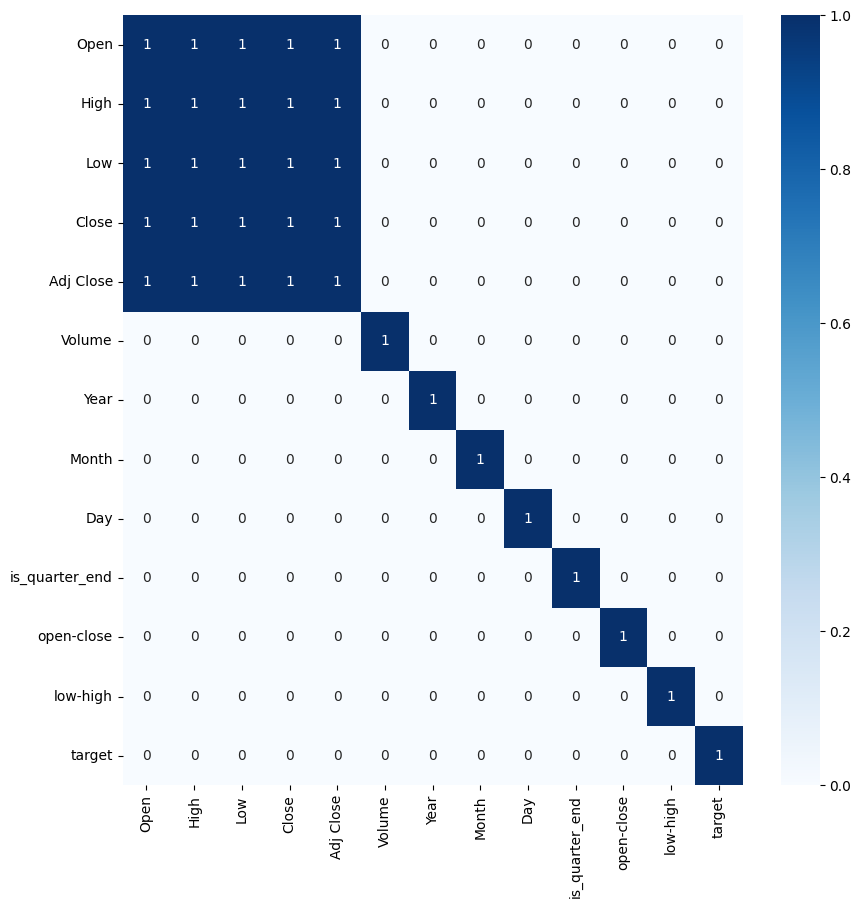

In [73]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr()>0.9, annot=True, cbar=True ,cmap="Blues")
plt.show()

**Data Splitting and Normalization**

In [74]:
features = df1[['open-close', 'low-high', 'is_quarter_end']]
target = df1['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(3121, 3) (347, 3)


**Model Development and Evaluation**

In [75]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5137440660983261
Validation Accuracy :  0.49362185266813596

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4928846564496789
Validation Accuracy :  0.5073298604154144

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

In [90]:
from sklearn import metrics
# metrics.confusion_matrix(X_valid, Y_valid)
metrics.plot_confusion_matrix(models[0],X_valid,Y_valid)
plt.show()
# metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [83]:
models[0]

LogisticRegression()

In [84]:
 X_valid

array([[-0.11623335,  0.40400131,  1.39875721],
       [ 0.54443559,  0.40478553,  1.39875721],
       [ 0.02956625,  0.49318078, -0.71492035],
       ...,
       [-0.4448493 ,  0.58157603, -0.71492035],
       [ 0.19873718,  0.94285396, -0.71492035],
       [-0.42278192,  0.41631478,  1.39875721]])

In [85]:
Y_valid

2556    1
1723    1
1132    0
2671    1
193     1
       ..
1014    0
1538    1
1672    0
1010    0
48      1
Name: target, Length: 347, dtype: int64